### **Exercise: Dummy Variables and One Hot Encoding**

#### Problem Statement

You are provided with a dataset `smartphone_prices.csv` containing information about different smartphone models, their brand, RAM size (in GB), and their price in INR. The brand is a categorical variable. Your tasks are:

1. Load and explore the dataset.
2. Visualize the relationship between RAM and price, and between brand and price.
3. Convert the `brand` column into dummy variables and avoid the dummy variable trap.
4. Train a linear regression model to predict price using RAM and brand dummies.
5. Evaluate the model's R² score.
6. Use scikit-learn's `OneHotEncoder` to encode the brand column and train another model.
7. Predict the price of a new smartphone: Brand = 'OnePlus', RAM = 8GB.
8. Briefly explain each step and the outcome.

### 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

### 2. Load and Explore the Dataset

Let's load the smartphone prices dataset. Each record contains the smartphone's brand, RAM size, and price in INR.

In [2]:
df = pd.read_csv('smartphone_prices.csv')
df.head()

,brand,ram_gb,price
0,Samsung,4,15000
1,Apple,4,45000
2,OnePlus,6,30000
3,Samsung,6,18000
4,Apple,6,48000


Let's check the unique brands and basic statistics.

In [3]:
print('Unique brands:', df['brand'].unique())

Unique brands: ['Samsung' 'Apple' 'OnePlus']


In [5]:
df.describe()

,ram_gb,price
count,20.000000,20.000000
mean,7.400000,33525.000000
std,2.760625,13115.353598
min,4.000000,15000.000000
25%,6.000000,20750.000000
50%,7.000000,31500.000000
75%,8.000000,47250.000000
max,12.000000,52000.000000


### 3. Visualize the Data

Let's visualize the relationship between RAM and price, and between brand and price.

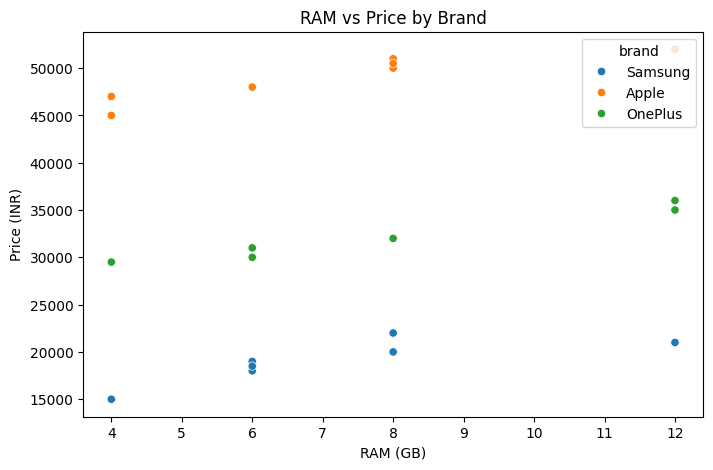

In [6]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='ram_gb', y='price', hue='brand', data=df)
plt.title('RAM vs Price by Brand')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (INR)')
plt.show()

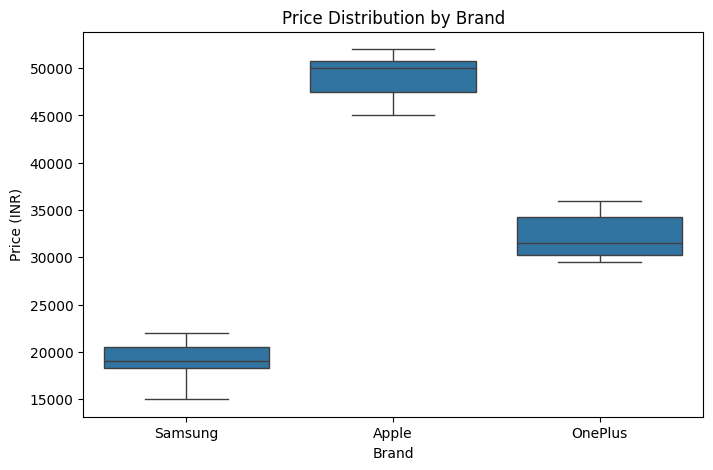

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot(x='brand', y='price', data=df)
plt.title('Price Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Price (INR)')
plt.show()

### 4. Creating Dummy Variables

Convert the `brand` column into dummy variables and drop one to avoid the dummy variable trap.

In [8]:
df_dummies = pd.get_dummies(df, columns=['brand'], dtype=int)
df_dummies.head()

,ram_gb,price,brand_Apple,brand_OnePlus,brand_Samsung
0,4,15000,0,0,1
1,4,45000,1,0,0
2,6,30000,0,1,0
3,6,18000,0,0,1
4,6,48000,1,0,0


In [9]:
df_dummies = df_dummies.drop('brand_Apple', axis=1)
df_dummies.head()

,ram_gb,price,brand_OnePlus,brand_Samsung
0,4,15000,0,1
1,4,45000,0,0
2,6,30000,1,0
3,6,18000,0,1
4,6,48000,0,0


### 5. Modeling with Dummy Variables

Train a linear regression model to predict price using RAM and brand dummies.

In [10]:
X = df_dummies.drop('price', axis=1)
y = df_dummies['price']
model = LinearRegression()
model.fit(X, y)
print('Model coefficients:', model.coef_)
print('Model intercept:', model.intercept_)
print('R² score:', model.score(X, y))

Model coefficients: [   775.2016129  -17485.88709677 -30000.        ]
Model intercept: 43534.27419354838
R² score: 0.9941429785635915


### 6. One Hot Encoding with Scikit-learn

Use `OneHotEncoder` from scikit-learn to encode the brand column and train another model.

In [11]:
X2 = df[['brand', 'ram_gb']]
y2 = df['price']

ct = ColumnTransformer([
    ('brand_ohe', OneHotEncoder(drop='first'), ['brand'])
], remainder='passthrough')

X2_encoded = ct.fit_transform(X2)

In [12]:
model2 = LinearRegression()
model2.fit(X2_encoded, y2)
print('Model coefficients:', model2.coef_)
print('Model intercept:', model2.intercept_)
print('R² score:', model2.score(X2_encoded, y2))

Model coefficients: [-17485.88709677 -30000.            775.2016129 ]
Model intercept: 43534.27419354842
R² score: 0.9941429785635915


### 7. Predict the Price of a New Smartphone

Predict the price of a new smartphone: Brand = 'OnePlus', RAM = 8GB.

In [13]:
# For OneHotEncoder(drop='first'), order is [brand_OnePlus, brand_Samsung, ram_gb]
pred_new = model2.predict([[1, 0, 8]])
print(f'Predicted price for OnePlus 8GB: ₹{pred_new[0]:.2f}')

Predicted price for OnePlus 8GB: ₹32250.00


### 8. Summary

* In this exercise, we learned how to handle categorical variables using dummy variables and one hot encoding. 

* We trained linear regression models to predict smartphone prices in INR, evaluated their performance, and made predictions for new data. 

* This process is essential for preparing real-world data for regression and classification tasks.

---